### Chapter 1 - Fundamentals of Data Manipulation with Python

# Table of Contents

1.1 Introduction to the Course

1.2 Fundamentals of Data Manipulation


# 1.1 Introduction to the Course

## 1. Functions

In [1]:
for i in range (0, 1000):
    m = i  * i - 1
    
print(m)

998000


In [2]:
def add(x, y) :
    return(x + y)

add(1, 1)

2

In [3]:
[1, 2] + [3, 4]

[1, 2, 3, 4]

In [4]:
1 in [1, 2, 3]

True

In [5]:
range(5)

range(0, 5)

In [6]:
x = {'Christopher': 123, 'Bill Gates': 456}
x['Christopher']

123

In [7]:
x['Kevyn Collins-Thompson'] = None
x

{'Christopher': 123, 'Bill Gates': 456, 'Kevyn Collins-Thompson': None}

In [8]:
for name in x:
    print(x[name])

123
456
None


In [9]:
for email in x.values():
    print(email)

123
456
None


In [10]:
for name, email in x.items():
    print(name)
    print(email)

Christopher
123
Bill Gates
456
Kevyn Collins-Thompson
None


## 2. Types and Sequences

In [11]:
x = ('Christopher', 'Brooks', 'brooksch@umich.edu')
fname, lname, email = x
x

('Christopher', 'Brooks', 'brooksch@umich.edu')

In [12]:
fname

'Christopher'

In [13]:
x = ('Christopher', 'Brooks', 'brooksch@umich.edu', 'Ann Arbor')
fname, lname, email = x

ValueError: too many values to unpack (expected 3)

## 3. More on Strings

In [15]:
print('Chris' + 2)

TypeError: can only concatenate str (not "int") to str

In [18]:
print('Chris' + str(2))

Chris2


In [19]:
sales_record = {'price': 3.24,
                'num_items': 4,
                'person': 'Chris'}

sales_statement = '{} bought {} item(s) at a price of {} each for a total of {}'

print(sales_statement.format(sales_record['person'],
                             sales_record['num_items'],
                             sales_record['price'],
                             sales_record['num_items'] * sales_record['price']
                            ))

Chris bought 4 item(s) at a price of 3.24 each for a total of 12.96


## 4. Python Demonstration: Reading and Writing CSV files

#### Data Files and Summary Statistics

In [23]:
import csv

%precision 2                             # floating point precision for printing to 2

with open('mpg.csv') as csvfile :        # read in 'mpg.csv' using csv.DicReader
    mpg = list(csv.DictReader(csvfile))  # convert it to a list of dictionaries
    
mpg[ :3]

[OrderedDict([('mpg', '18'),
              ('cylinders', '8'),
              ('displacement', '307'),
              ('horsepower', '130'),
              ('weight', '3504'),
              ('acceleration', '12'),
              ('model_year', '70'),
              ('origin', '1'),
              ('name', 'chevrolet chevelle malibu')]),
 OrderedDict([('mpg', '15'),
              ('cylinders', '8'),
              ('displacement', '350'),
              ('horsepower', '165'),
              ('weight', '3693'),
              ('acceleration', '11.5'),
              ('model_year', '70'),
              ('origin', '1'),
              ('name', 'buick skylark 320')]),
 OrderedDict([('mpg', '18'),
              ('cylinders', '8'),
              ('displacement', '318'),
              ('horsepower', '150'),
              ('weight', '3436'),
              ('acceleration', '11'),
              ('model_year', '70'),
              ('origin', '1'),
              ('name', 'plymouth satellite')])]

In [24]:
len(mpg)   # 398 dictionaries in a list

398

In [25]:
mpg[0].keys()

odict_keys(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name'])

In [26]:
sum(float(d['cylinders']) for d in mpg) / len(mpg) # average number of cylinders

5.454773869346734

In [27]:
cyl = set(d['cylinders'] for d in mpg)  # set of the unique values in the cylinder entry of dictionaries
cyl

{'3', '4', '5', '6', '8'}

## 5. Python Dates and Times

In [28]:
# Get the current time
import datetime as dt
import time as tm

tm.time()

1616074042.16744

In [29]:
dtnow = dt.datetime.fromtimestamp(tm.time())
dtnow

datetime.datetime(2021, 3, 18, 2, 27, 22, 173606)

In [30]:
dtnow.year, dtnow.month, dtnow.day, dtnow.hour, dtnow.minute, dtnow.second

(2021, 3, 18, 2, 27, 22)

In [31]:
dt.date.today() - dt.timedelta(days = 100)

datetime.date(2020, 12, 8)

## 6. Python Objects, map()

In [32]:
class Person :
    department = 'School of Information'
    
    def set_name(self, new_name) :
        self.name = new_name
    
    def selt_location(self, new_location) :
        self.location = new_location

- **map(function, iterable, ...)** function
  - Return an iterator that applies function to every item of iterable, yielding the results

In [33]:
store1 = [10.00, 11.00, 12.34, 2.34]
store2 = [9.00, 11.10, 12.34, 2.01]

cheapest = map(min, store1, store2)
cheapest # lazy evaluation: python returns a map object

In [34]:
list(cheapest)

[9.0, 11.0, 12.34, 2.01]

Example:

In [35]:
people = ['Dr. Christopher Brooks', 'Dr. Kevyn Collins-Thompson']

def split_title_lname(person) :
    title = person.split()[0]
    lastname = person.split()[-1]
    
    return '{}{}'.format(title, lastname)

list(map(split_title_lname, people))

['Dr.Brooks', 'Dr.Collins-Thompson']

## 7. Advanced Python Lamnda and List Comprehension

#### Lambda

- Lamda's are Python's way of creating anonymous functions
- Same as other functions, but they have no name
- Much more limited than full function definitions
- but they are very useful for simple little data cleaning tasks

In [36]:
my_function = lambda a, b, c : a + b

my_function(1, 2, 3)

3

Example:

In [37]:
people = ['Dr. Christopher Brooks', 'Dr. Kevyn Collins-Thompson']

def split_title_lname(person) :
    return person.split()[0] + ' ' + person.split()[-1]

# option 1
for person in people :
    print(split_title_lname(person) == (lambda x: x.split()[0] + ' ' + x.split()[-1])(person))
    
# option 2
list(map(split_title_lname, people)) == list(map(lambda person: person.split()[0] + ' ' + person.split()[-1], people))

True
True


True

#### List Comprehensions

In [38]:
# Create a list of numbers from 0 to 999 that is divisible by 2
my_list = []

for number in range(0, 1000) :
    
    if number % 2 == 0 :
        my_list.append(number)

my_list[ :5]

[0, 2, 4, 6, 8]

In [39]:
my_list = [number for number in range(0, 1000) if number % 2 == 0]
my_list[ :5]

[0, 2, 4, 6, 8]

# 1. 2 Fundamentals of Data Manipulation

## 1. Numerical Python Libarary (NumPy)

- Fundamental package for numeric computing with Python

In [40]:
import numpy as np
import math

## 2. Array Creation

In [41]:
# Arrays are displayed as a list or list of lists and can be created through list as well
# When creating an array, we we pass in a list as an orgument in numpy array

a = np.array([1, 2, 3])
print(a)

# We can print the number of dimensions of a list using the ndim attribute
print(a.ndim)

[1 2 3]
1


In [149]:
# If we pass in a list of lists in a numpy array, we create a multi-dimentional array, for in stnace, a mtatrix
b = np.array([[1, 2, 3], [4, 5, 6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [145]:
b.shape

(2, 3)

In [151]:
# We can also check the type of items in the array
a.dtype

dtype('int64')

In [45]:
# Besides integers, floats are also accepted in numpy arrays
c = np.array([2.2, 5, 1.1])
c.dtype.name

'float64'

In [46]:
# Let's look at the data in our array
c

array([2.2, 5. , 1.1])

In [47]:
# Note that numpy automatically converts integers, like 5, up to floats, since there is no loss of precision.
# Numpy will try and give you the best data type format possible to keep your data types homogeneous,
# which means all the same, in the array


In [48]:
# Sometimes we know the shape of an array that we want to create, but not what we want to be in it.
# Numpy offers several functions to create arrays with initial placeholders, such as zero's or one's.
# Let's create two arrays, both the same shape but with different filler values
d = np.zeros((2, 3))
print(d)

e = np.ones((2, 3))
print(e)


[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [49]:
# We can also generate an array with random numbers
np.random.rand(2, 3)


array([[0.98766798, 0.20195461, 0.53958625],
       [0.39302818, 0.73701583, 0.98404006]])

In [50]:
# You'll see zeros, ones, and random used quite often to create example arrays, especially in stack overflow
# posts and other forums.


In [51]:
# We can also create a sequence of numbers in an array with the arange() function.
# The first argument is the starting bound
# The second argument is the ending bound
# The third argument is the difference between each consecutive numbers

# Let's create an array of every even number from 10 (inclusive) to 50 (exclusive)
f = np.arange(10, 50, 2)
f


array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])

In [52]:
# If we want to generate a sequence of floats, we can use the linspace() function.
# In this function the third argument isn't the difference between two numbers, 
# but the total number of items you want to generate

np.linspace(0, 2, 15) # 15 numbers from 0 (inclusive) to 2 (inclusive)


array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        , 1.14285714, 1.28571429,
       1.42857143, 1.57142857, 1.71428571, 1.85714286, 2.        ])

## 3. Array Operations

In [53]:
# We can do many things on arrays, such as mathematical manipulation
# (addition, substraction, square,exponents) as well as use boolean arrays.
# We can also do matrix manipulation such as product, transpose, inverse, and so forth.


In [54]:
# Arithmetic operators on array apply element-wise.

# Let's create a couple of arrays
a = np.array([10, 20, 30, 40])
b = np.array([1, 2, 3, 4])

# Now let's look at a minus b
c = a - b
print(c)

# And let's look at a times b
d = a * b
print(d)


[ 9 18 27 36]
[ 10  40  90 160]


In [55]:
# With arithmetic manipulation, we can convert current data to the way we want it to be.
# Here's a real-world problem I face.
#
# - I moved down to the U.S. about 6 years ago from Canada. In Canada we use celcius for temperatures,
#   and my wife still hasn't converted to the US system which uses farenheith.
#
# With numpy I could easily convert a number of farenheit values, say the weather forecast, to celius

# Let's create an array of typical Ann Arbor winter farenheit values
farenheit = np.array([0, -10, -5, -15, 0])

# And the formula for conversion is ((F - 32) x 5/9 = C)
celcius = (farenheit - 31) * (5/9)
celcius


array([-17.22222222, -22.77777778, -20.        , -25.55555556,
       -17.22222222])

In [56]:
# Great, so now she knows it's a little chilly outside but not so bad


In [57]:
# Another usefull and important manipulation is the boolean array.
# We can apply an operator on an array, and a boolean array will be returned for any element in the original,
# with True being emitted if it meets the condition
# For instance, if we want to get a boolean array to check celcius degrees that are greater than -20 degrees
celcius % 2 == 0


array([False, False,  True, False, False])

In [58]:
# Besides element-wise manipulation, it is important to know that numpy supports matrix manipulation.
# Let's look at matrix product. If we want to do elemnt-twise product, we use the "*" sign

A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0], [3, 4]])
print(A * B)

# If we wnat to do matrix operation, we use the "@" sign or use the dot function
print(A @ B)


[[2 0]
 [0 4]]
[[5 4]
 [3 4]]


In [59]:
# You don't have to worry about complex matrix operations for this course, but it's important to know that
# numpy is the underpinning of scientific computing libraries in python,and that it is capable of doing
# both element-wise operations (the asterix) as well as matrix-level operation (the @ sign)
# There's more on this in a ssubsequent courses.


In [60]:
# A few more linear algebra concepts are woth layering in here. You might recall that the product of two
# matrices is only plausible when the inner dimensions of the two matrices are the same. The dimensions refer
# to the number of elements both horizontally and vertically in the rendered matricies you've seen here.
# We can use numpy to quickly see the shape of a matrix:
A.shape


(2, 2)

In [61]:
# When manipulating arrays of different types, the type of the resulting array will correspond to
# the more general of the two types. This is called "upcasting"

# Let's create an array of integers
array1 = np.array([[1, 2, 3], [4, 5, 6]])
print(array1.dtype)

# Now let's create an array of floats
array2 = np.array([[7.1, 8.2, 9.1], [10.4, 11.2, 12.3]])
print(array2.dtype)


int64
float64


In [62]:
# Integers (int) are whole numbers only, and the Floating point numbers (float) can have a whole number portion
# and a decimal portion. The 64 in this example refers to the number of bits that the operating system is
# reserving to represent the number, which determines the size (or precision) of the numbers that can be
# represented.


In [63]:
# Let's do an addition for the two arrays
array3 = array1 + array2
print(array3)
array3.dtype


[[ 8.1 10.2 12.1]
 [14.4 16.2 18.3]]


dtype('float64')

In [64]:
# Notice how the items in the resulting array have been upcast into floating point numbers


In [65]:
# Numpy arrays have many interesting aggregation functions on them, such as sum(), max(), min(), and mean()
print(array3.sum())
print(array3.max())
print(array3.min())
print(array3.mean())


79.3
18.3
8.1
13.216666666666667


In [66]:
# For two dimensional arrays, we can do the same thing for each row or column
# let's create an array with 15 elements, ranging from 1 to 15.
# with a dimension of 3 X 5
b = np.arange(1, 16, 1)
print(b)

b = np.arange(1, 16, 1).reshape(3, 5)
b


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [67]:
# Now, we often think about two dimensional arays being made up of rows and columns, but you can also think
# of these arrays as just a giant ordered list of numbers, and the *shape* of the array, the number of rows
# and columns, is just an abstaction that we have for a particular purpose. Acutally, this exactly how
# basic images are stored in computer environments.

# Let's take a look at an example and see how numpy comes in to play.


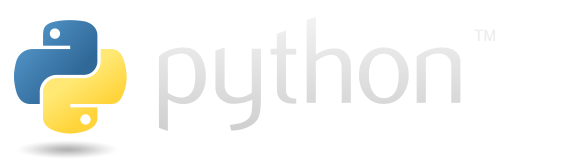

In [68]:
# For this demonstraction, I'll use the python image library (PIL) and a function to display images in the
# Jupyter notebook
from PIL import Image
from IPython.display import display

# And let's just look at the image I'm talking about
im = Image.open('python.png')
display(im)


In [69]:
# Now, we can convert this PIL image to a numpy array
array = np.array(im)
print(array.shape)

array


(164, 580, 4)


array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [153]:
# Here we see that we have a 164 x 580 x 4) arrray and that the values are all "unit8". The unit means that they are
# unsigned integers (so no negative numbers) and the 8 means 8 bits per byte. This means that each value can
# be up to 2*2*2*2*2*2*2*2 = 256 in size (because we start at 0). For black and white images
# black is stored as 0 and white is stored as 255. So if we just want to invert this image we could
# use the numpy array to do so

# Let's create an array the same shape
mask = np.full(array.shape, 255)
mask


array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [71]:
# Now let's substact that from the modified array
modified_array = array - mask

# And let's convert all of the negative values to positive values
modified_array = modified_array * -1

# And as a last step, let's tell numpy to set the value of the datatype correctly
modified_array = modified_array.astype(np.uint8)
modified_array


array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0

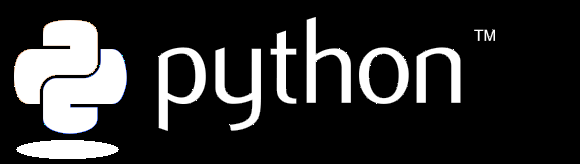

In [72]:
# And lastly, let's display this new array. We do this by using the fromarray() function in the python
# image library (PIL) to convert the numpy array into an object jupyter can render
display(Image.fromarray(modified_array))


(82, 1160, 4)


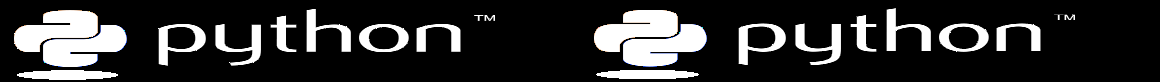

In [73]:
# Cool. Ok, remember how I started this by talking about how we could just think of this as a giant array
# of bytes, and that the shape was an abstaction? Well, we could just decide to reshape the array and still
# try and render it. PIL is interpreting the individual rows as lines, so we can change the number of lines
# and columns if we want to. What do you think that would look like?
reshaped = np.reshape(modified_array,(82, 1160, 4))

164, 580, 4

print(reshaped.shape)
display(Image.fromarray(reshaped))

In [74]:
# Can't say I find that particularly flattering. By reshaping the array to be only 100 rows high but 400
# columns we've essentially doubled the image by taking every other line and stacking them out in width.
# This makes the image look more stretched out too.

# This isn't an image manipulatino course, but the point was to show you that these numpy arrays are really
# just abstactions on top of data, and that data has an underlying format (in this case, uint8). But further,
# we can build abstactions on top of that, such as computer code which renders a byte as either black or
# white, which has meaning to people. In some ways, this whole degree is about data and the abstactions that 
# we can build on top of that data, from individual byte representations through to complex neural networks of
# functions or interactive visualizations. Your role as a data scientist is to understand what the data means
# (it's context in a collection), and to transform it into a different representation to be used for 
# sensemaking.


In [75]:
# Ok, back to the mechanics of numpy.


## 4. Indexing, Slicing and Iterating

In [76]:
# Indexing, slicing and iterating are extremely important for data manipulation and analysis because these
# techniques allow us to select data based on conditions, and copy or update data.


### Indexing

In [77]:
# First, we are going to look at integer indexing. A one-dimensinoal array, works in similar ways as a list
# To get an element in a one-dimensional array, we simply use the offset index.

a = np.array([1, 3, 5, 7])
a[2]


5

In [156]:
# For multidimensional array, we need to use integer array indexing. Let's create a new mutidimensional array

a = np.array([[1, 2], [3, 4], [5, 6]])
a


array([[1, 2],
       [3, 4],
       [5, 6]])

In [159]:
# if we want to select one certain element, we can do so by entering the index, which is comprised of two
# integers the first being the row, and the second being the column

a[1, 1] # remember in python we start a 0!


4

In [80]:
# if we want to get multiple elements
# for example, 1, 4, and 6 and put them into a one-dimensional array
# we can enter the indices directly into an array function

np.array([a[0, 0], a[1, 1], a[2, 1]])


array([1, 4, 6])

In [81]:
# we can also do that by using another form of array indexing, which essentially "zips" the first list and the
# second list up

print(a[[0, 1, 2]])
print()
print(a[[0, 1, 1]])
print()
print(a[[0, 1, 2], [0, 1, 1]])


[[1 2]
 [3 4]
 [5 6]]

[[1 2]
 [3 4]
 [3 4]]

[1 4 6]


### Boolean Indexing

In [82]:
# Boolean indexing allows us to select arbitrary elements based on conditions. For example, in the matrix we
# just talked about we want to find elements that are greater than 5 so we set up a condition a > 5

print(a > 5)
# This returns a boolean array showing that if the value at the corresponding index is greater than 5


[[False False]
 [False False]
 [False  True]]


In [83]:
# We can then place this array of booleans like a mask over the original array to return a one-dimensional
# array relating to the True values

print(a[a > 5])


[6]


In [84]:
# As we will see, this functionality is essential in the pandas toolkit which is the bulk of this course


### Slicing

In [85]:
# Slicing is a way to create a sub-array based on the original array. For one-dimensional arrays, slicing 
# works in similar ways to a list. To slice, we use the : sign. For instance, if we put :3 in the indexing
# brackets, we get elemnts from index 0 to index 3 (excluding index 3)

a = np.array([0, 1, 2, 3, 4, 5])
print(a[ :3])


[0 1 2]


In [86]:
# By putting 2:4 in the bracket, we get elements from index 2 to index 4 (excluding index 4)

print(a[2:4])


[2 3]


In [160]:
# For multi-dimensional arrays, it works similarly, let's see an example

a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [161]:
# First, if we put one argument in the array, for example a[ :2], we would get all the elements from the
# first (0th) and secod row (1st)

a[ :2]


array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [162]:
# If we add another argument to the array, for example a[ :2, 1:3], we get the first two rows but then the
# second and third column values only

a[ :2, 1:3]


array([[2, 3],
       [6, 7]])

In [90]:
# So, in multidimensional arrays, the first argument is for selecting rows, and the second argument is for 
# selecting columns


In [164]:
# It is important to realize that a slice of an array is a view into the same data. This is called passing by
# reference. So modifying the sub array will consequently modify the original array.

# Here, I'll change the element at position [0, 0], which is 2, to 50. then we can see that the value in the
# original array is changed to 50 as well

sub_array = a[ :2, 1:3]

print(sub_array)
print("sub array index [0, 0] value before change:", sub_array[0, 0])

sub_array[0, 0] = 50
print("sub array index [0, 0] value after change:", sub_array[0, 0])
print("original array index [0, 1] value after change:", a[0, 1])

[[50  3]
 [ 6  7]]
sub array index [0, 0] value before change: 50
sub array index [0, 0] value after change: 50
original array index [0, 1] value after change: [[ 1 50  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


### Trying NumPy with Datasets

In [92]:
# Now that we have learned the essentials of Numpy, let's use it on a couple of datasets


In [93]:
# Here, we have a very popular dataset on wine quality, and we are going to only look at red wines. The data
# fields include: fixed acidity, volatile aciditycitric acid, residual sugar, chlories, free sulfur dioxide,
# total sulfur dioxidedensity, pH, sulphates, alcohol, quality


In [94]:
# To load a datset in Numpy, we can use the genfromtxt() function. We can specify data file name, delimiter
# (which is optional but often used), and number of rows to skip if we have a header row, hence it is 1 here

# The genfromtxt() function has a parameter called dtype for specifying data types of each column. This
# parameter is optiona. Without specifying the types, all types will be casted the same to the more
# general/precise type

wines = np.genfromtxt("winequality-red.csv", delimiter = ";", skip_header = 1)
wines


array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [95]:
# Recall that we can use integer indexing to get a certain column or a row. For example, if we want to select
# the fixed acidity column, which is the first column, we can do so by entering the index into the array.
# Also remember that for multidimensional arrays, the first argument refers to the row, and the second
# argument refers to the column, and if we just give one argument, then we'll get a single dimensional list
# back.

# So all rows combined but only the first column from them would be
print("one integer 0 for slicing:", wines[ :, 0])
# But if we wanted the same values but wanted to preserve that they sit in their own rows, we would write
print("0 to 1 for slicing: \n", wines[ :, 0:1])


one integer 0 for slicing: [7.4 7.8 7.8 ... 6.3 5.9 6. ]
0 to 1 for slicing: 
 [[7.4]
 [7.8]
 [7.8]
 ...
 [6.3]
 [5.9]
 [6. ]]


In [96]:
# This is another great example of how the shape of the data is an abstaction which we can layer
# intentionally on top of the data we are working with.


In [97]:
# If we want a range of columns in order, say column 0 through 3 (recall, this means first, second, and
# third, since we start at zero and don't include the training index value), we can that too

wines[ :, 0:3]


array([[7.4  , 0.7  , 0.   ],
       [7.8  , 0.88 , 0.   ],
       [7.8  , 0.76 , 0.04 ],
       ...,
       [6.3  , 0.51 , 0.13 ],
       [5.9  , 0.645, 0.12 ],
       [6.   , 0.31 , 0.47 ]])

In [98]:
# What if we wnat several non-consecutive columns? We can place the indices of the columns that we want into
# an array and pass the array as the second argument. Here's an example

wines[ :, [0, 2, 4]]


array([[7.4  , 0.   , 0.076],
       [7.8  , 0.   , 0.098],
       [7.8  , 0.04 , 0.092],
       ...,
       [6.3  , 0.13 , 0.076],
       [5.9  , 0.12 , 0.075],
       [6.   , 0.47 , 0.067]])

In [173]:
# We can also do some basic summarization of this dataset. For example, if we want to find out the average
# quality of red wine, we can select the quality column. We could do this in a couple of ways, but the most
# appropriate is to use the -1 value for the index, as negative numbers mean slicing from the back of the
# list. We can then call the aggregation functions on this data.

wines[ :, -1].mean()


5.6360225140712945

In [100]:
# Let's take a look at another dataset, this time on graduate school admissions. It has fields such as GRE
# score, TOEFL socre, university rating, GPA, having research experience or not, and a change of admission.
# With this dataset, we can do data manipulation and basic analysis to infer what conditions are associated
# with higher chance of admission. Let's take a look.


In [101]:
# We can specify data field names when using genfromtxt() to load CSV data. Also, we can have NumPy try and 
# infer the type of a column by setting the dtype parameter to None

graduate_admission = np.genfromtxt('Admission_predict.csv', dtype = None, delimiter = ',', skip_header = 1, 
                                   names = ('Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
                                           'LOR', 'CGPA', 'Research', 'Chance of Admit'))

graduate_admission

array([(  1, 337, 118, 4, 4.5, 4.5, 9.65, 1, 0.92),
       (  2, 324, 107, 4, 4. , 4.5, 8.87, 1, 0.76),
       (  3, 316, 104, 3, 3. , 3.5, 8.  , 1, 0.72),
       (  4, 322, 110, 3, 3.5, 2.5, 8.67, 1, 0.8 ),
       (  5, 314, 103, 2, 2. , 3. , 8.21, 0, 0.65),
       (  6, 330, 115, 5, 4.5, 3. , 9.34, 1, 0.9 ),
       (  7, 321, 109, 3, 3. , 4. , 8.2 , 1, 0.75),
       (  8, 308, 101, 2, 3. , 4. , 7.9 , 0, 0.68),
       (  9, 302, 102, 1, 2. , 1.5, 8.  , 0, 0.5 ),
       ( 10, 323, 108, 3, 3.5, 3. , 8.6 , 0, 0.45),
       ( 11, 325, 106, 3, 3.5, 4. , 8.4 , 1, 0.52),
       ( 12, 327, 111, 4, 4. , 4.5, 9.  , 1, 0.84),
       ( 13, 328, 112, 4, 4. , 4.5, 9.1 , 1, 0.78),
       ( 14, 307, 109, 3, 4. , 3. , 8.  , 1, 0.62),
       ( 15, 311, 104, 3, 3.5, 2. , 8.2 , 1, 0.61),
       ( 16, 314, 105, 3, 3.5, 2.5, 8.3 , 0, 0.54),
       ( 17, 317, 107, 3, 4. , 3. , 8.7 , 0, 0.66),
       ( 18, 319, 106, 3, 4. , 3. , 8.  , 1, 0.65),
       ( 19, 318, 110, 3, 4. , 3. , 8.8 , 0, 0.63),
       ( 20,

In [102]:
# Notice that the resulting array is actually a one-dimensional array with 400 tuples
graduate_admission.shape


(400,)

In [103]:
# We can retrieve a column from the array using the column's name for example, let's get the CGPA column and
# only the first five values.

graduate_admission['CGPA'][0:5]

array([9.65, 8.87, 8.  , 8.67, 8.21])

In [104]:
# Since the GPA in the dataset range from 1 to 10, and in the US it's more common to use a scale of up to 4,
# a common task might be to convert the GPA by dividing by 10 and then multiplying by 4

graduate_admission['CGPA'] = graduate_admission['CGPA'] / 10 * 4
graduate_admission['CGPA'][0:20] # let's get 20 values


array([3.86 , 3.548, 3.2  , 3.468, 3.284, 3.736, 3.28 , 3.16 , 3.2  ,
       3.44 , 3.36 , 3.6  , 3.64 , 3.2  , 3.28 , 3.32 , 3.48 , 3.2  ,
       3.52 , 3.4  ])

In [105]:
# Recall boolean masking. We can use this to find out how many students have had research experience by
# creating a boolean mask and passing it to the array indexing operator

len(graduate_admission[graduate_admission['Research'] == 1])


219

In [106]:
# Since we have the data field chance of admission, which ranges from 0 to 1, we can try to see if students
# with high chance of admission (> 0.8) on average have higher GRE score than those with lower chance of 
# admission (< 0.4)

# So first we use boolean masking to pull out only those students we are interested in based on their chance
# of admission, then we pull out only their GPA scores, then we print the mean values.

print(graduate_admission[graduate_admission['Chance_of_Admit'] > 0.8]['GRE_Score'].mean())
print(graduate_admission[graduate_admission['Chance_of_Admit'] < 0.4]['GRE_Score'].mean())


328.7350427350427
302.2857142857143


In [107]:
# Let's also do this with GPA

print(graduate_admission[graduate_admission['Chance_of_Admit'] > 0.8]['CGPA'].mean())
print(graduate_admission[graduate_admission['Chance_of_Admit'] < 0.4]['CGPA'].mean())


3.0222857142857142

In [108]:
# Hrm, well, I guess one could have expected this. The GPA and GRE for students who have a higher chance of
# being admitted, at least based on our cursory look here, seems to be higher.


## 5. Manipulating Text with Regular Expressions

In [174]:
# First, we'll import the "re" module, which is where Python stores regular expression libraries
import re


In [178]:
## There are several main processing functions in "re" that you might use. The first, match() checks for 
# a match that is at the beginning of the string and returns a boolean. Similarly, search(), checks for 
# a match anywhere in the string, and returns a boolean.

# Let's create some text for an example
text = "This is a good day."

# Now, let's see if it's a good day or not :
if re.search("good", text) : # the first parameter here is the pattern
    print("Wonderful!")
    
else :
    print("Alas :()")
    

Wonderful!


In [180]:
re.search("^This", text)


<re.Match object; span=(0, 4), match='This'>

In [111]:
# In addition to checking for conditionals, we can segment a string. The work that regex does here is called
# tokenizing, where the string is separated into substrings based on patterns. Tokenizing is a core activity
# in natural language processing, which we won't talk much about here but that you will study in the future

# The findall() and split() function will parse the string for us and return chunks. Let's try an example.
text = "Amy works diligently. Amy gets good grades. Our student Amy is successful"

# This is a bit of a fabricated example, but let's split this on all instances of Amy
re.split("Amy", text)


['',
 ' works diligently. ',
 ' gets good grades. Our student ',
 ' is successful']

In [112]:
# You'll notice that split has returned an empty string, followed by a number of statements about Amy, all as
# elements of a list. If we want to count how many times we have talked about Amy, we could use findall()
re.findall('Amy', text)


['Amy', 'Amy', 'Amy']

In [113]:
# Ok, so we've seen that .search() looks for some pattern and and returns a boolean, that .split() will use a
# pattern for creating a list of substrings, and that .findall() will look for a pattern and pull out all
# occurences.


In [114]:
# The caret character ^ means start and the dollar sign character $ means end.

# Here's an example
text = "Amy works diligently. Amy gets good grades. Our student Amy is succesful"

# Let's see if this begins with Amy
re.search("^Amy", text)


<re.Match object; span=(0, 3), match='Amy'>

In [115]:
# Notice that re.search() actually returned to us a new object, called re.Math object. An re.Match object
# always has a boolean value of True, as somethign was found, so you can always evaluate it in an "if"
# statement as we did earlier. The rendering of the match object also tells you, what pattern was matched,
# In this case, the word Amy, and the location that match was in, as the span.


### Patterns and Character Classes

In [116]:
# Let's talk more about patterns and start with character classes. Let's create a string of a single learners'
# grades over a semester in one course across all of their assignments
grades = 'ACAAAABCBCBAA'

# If we want to answer the question "How many B's were in the grade list?" we would just use B
re.findall("B", grades)


['B', 'B', 'B']

#### Set [ ] operator

In [117]:
# If we wanted to count the number of A's or B's in the list, we can't use "AB" since this is used to match
# all A's followed immediately by a B. Instead, we put the characters A and B inside square brackets
re.findall("[AB]", grades)


['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A']

In [118]:
# This is called the set operator. You can also include a range of characters, which are ordered
# alphanumerically. For instance, if we want to refer to all lower case letters we could use [a-z]. Lets build
# a simple regex to parse out all instances where this student receive an A followed by a B or a C
re.findall("[A][B-C]", grades)


['AC', 'AB']

#### Pipe | operator

In [119]:
# Notice how the [AB] pattern describes a set of possible characters which could be either (A or B), while the
# [A][B-C] pattern denoted two sets of characters which must have been matched back to back. You can write
# this pattern by using the pipe operator, which means OR
re.findall("AB|AC", grades) # same result as above


['AC', 'AB']

In [120]:
# We can use the caret with the set operator to negate our results. For instance, if we want to parse out only
# the grades which were not A's
re.findall("[^A]", grades)


['C', 'B', 'C', 'B', 'C', 'B']

In [121]:
# Note this carefully - the caret was previously matched to the beginning of a string as an anchor point, but
# inside of the set operator the craet, and the other special characters we will be talking aobut, lose their
# meaning. This can be a bit confusing. What do you think the result would be of this?
re.findall("^[^A]", grades)


[]

In [122]:
# It's an empty list, because the regex says that we want to match any value at the beginning of the string
# which is not an A. Our string though starts with an A, so there is no match found. And remember when you are
# using the set operator, you are doing character-based matching. So you are matching individual chracterers in
# an OR mehtod.


### Quantifiiers e{min,max}

In [123]:
# Ok, so we've talked about anchors and matching to the beginning and end of patterns. And we've talked about
# characters and using sets with the [] notation. We've also talked about character negation, and how the pipe
# | chracter allows us to do OR operations. Let's move on to quantifiers.


In [124]:
# Quantifiers are the number of times you want a pattern to be mathced in order to match. The most basic
# quantifier is expressed as e{m,n}, where e is the expression or character we are matching, m is the minimum
# number of times you want it to matched, and n is the maximum number of times the item could be matched.

# Let's use these grades as an example. How many times has this student been on a back-to-back A's streak?
print(re.findall("A{4}", grades))
re.findall("A{2,10}", grades) # we'll use 2 as our min, but 10 as our max


['AAAA']


['AAAA', 'AA']

In [125]:
# So we see that there were two streaks, one where the student had 4 A's, and one where they had only two
# A's

# We might try and do this using single values and just repeating the pattern
print(re.findall("A{2}", grades))
re.findall("A{1,1}A{1,1}", grades)


['AA', 'AA', 'AA']


['AA', 'AA', 'AA']

In [126]:
# As you can see, this is different than the first example. The first pattern is looking for any combination
# of two A's up to ten A's in a row. So it sees four A's as a single streak. The second pattern is looking for
# two A's back to back, so it sees two A's followed immdiately by two more A's. We say that the regex
# processor begins at the start of the string and consumes variables which match patterns as it does.

# It's important to note that the regex quantifier syntax does not allow you to deviate from the {m,n}
# pattern. In particular, if you have an extra space in between the braces you'll get an empty result
re.findall("A{2, 2}", grades)


[]

In [127]:
# And as we have already seen, if we don't include a quantifier than the default is {1,1}
re.findall("AA", grades)
# re.findall("A{1,1}A{1,1}", grades)


['AA', 'AA', 'AA']

In [128]:
# Oh, and if you just have one number in the braces, it's considered to be both m and n
re.findall("A{2}", grades)


['AA', 'AA', 'AA']

In [129]:
# Using this, we could find a decreasing trend in a student's grades
re.findall("A{1,10}B{1,10}C{1,10}", grades)


['AAAABC']

In [130]:
# Now, that's a bit of a hack, because we included a maximum that was just arbitrarily large. There are three
# other quantifiers that are used as short hand, as asterix * to match 0 or more times, a questino mark ? to
# match one or more times, or a + plus sign to match one or more times. Let's look at a more complex example,
# and load some data scraped from wikipedia

with open("ferpa.rtf", "r") as file :
    # we'll read that into a variable called wiki
    wiki = file.read()

wiki

'{\\rtf1\\ansi\\ansicpg1252\\cocoartf2578\n\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\fswiss\\fcharset0 Helvetica;}\n{\\colortbl;\\red255\\green255\\blue255;}\n{\\*\\expandedcolortbl;;}\n\\margl1440\\margr1440\\vieww11520\\viewh8400\\viewkind0\n\\pard\\tx720\\tx1440\\tx2160\\tx2880\\tx3600\\tx4320\\tx5040\\tx5760\\tx6480\\tx7200\\tx7920\\tx8640\\pardirnatural\\partightenfactor0\n\n\\f0\\fs24 \\cf0 \\{\\{multiple issues|\\{\\{more citations needed|date=January 2012\\}\\}\\\n\\{\\{lead too short|date=May 2015\\}\\}\\}\\}\\\n\\{\\{Infobox U.S. legislation\\\n| name = FERPA\\\n| fullname = Family Educational Rights and Privacy Act\\\n| acronym = \\\n| nickname = \\\n| enacted by = \\\n| effective date = \\\n| public law url = \\\n| cite public law = \\\n| cite statutes at large = \\{\\{USC|20|1232g\\}\\}\\\n| acts amended = \\\n| acts repealed = \\\n| title amended = \\\n| sections created = <!--\\{\\{USC\\}\\} can be used-->\\\n| sections amended = \\\n| leghisturl = \\\n| introdu

In [131]:
# Scanning through this document, one of the things that the headers all have the wordds [edit]
# behind them, followed by a newline character. So if we wanted to get a list of all of the headers in this 
# article, we could do so using re.finddall
re.findall("[a-zA-Z]{1,100}\[edit]", wiki)


['Overview[edit]', 'records[edit]', 'records[edit]']

In [132]:
# Ok, that didn't quite work. It got all of the headers, but only the last word of the header, and it really
# was quite clunky. Let's iteratively improve this. First, we can use \w to match any letter, including digits
# and numbers.
re.findall("[\w]{1,100}\[edit]", wiki)


['Overview[edit]', 'records[edit]', 'records[edit]']

In [133]:
# This is somethign new. \w is a metacharacter, and indicates a special pattern of any letter or digit. There
# are acutally a number of different metacharacters listed in the documentation. For instance, \s matches any
# whitespace character.

# Next, there are three other quantifiers we can use which shorten up the curly brace syntax. We can use an
# asterix * to match 0 or more times, so let's try that.
re.findall("[\w]*\[edit]", wiki)


['Overview[edit]', 'records[edit]', 'records[edit]']

In [134]:
# Now that we have shortened the regex, let's improve it a little bit. We can add in a spaces using the space
# character
re.findall("[\w ]*\[edit]", wiki)


['Overview[edit]',
 'Access to public records[edit]',
 'Student medical records[edit]']

In [135]:
# Ok, so this gets us the list of section titles in the wikipedia page! You can now create a list of titles by
# iterating through this and applying another regex
for title in re.findall("[\w ]*\[edit]", wiki) :
    # Now we will take the intermediate result and split on the square bracket [ just taking the first result
    print(re.split("\[", title)[0])
    

Overview
Access to public records
Student medical records


### Groups ( )

- returns a tuple of the group

In [136]:
# Ok, this works, but it's a bit of a pain. To this point, we have been talking about a regex as a single
# pattern which is mathced. But, you can actually match different patterns, called groups, at the same time,
# and then refer to the groups you want. To group patterns together you use parentheses, which is actually
# pretty natural. Let's rewrite our findall() using groups
re.findall("([\w ]*)(\[edit])", wiki)


[('Overview', '[edit]'),
 ('Access to public records', '[edit]'),
 ('Student medical records', '[edit]')]

**re.finditer() returns a list of Match objects**

In [137]:
# Nice- we see that the Python re module breaks out the result by group. We can acutally refer to the groubs by
# number as well with the match objects that are returned. But, how do we get back a list of match objects?
# Thus far, we've seen that findall() returns strings, and search() and match() return individual Match
# objects. But what do we do if we want a list of Match objects? In this case, we use the function finditer()
for item in re.finditer("([\w ]*)(\[edit])", wiki) :
    print(item)
    print("Result:", item.groups())
    print()
    

<re.Match object; span=(3314, 3328), match='Overview[edit]'>
Result: ('Overview', '[edit]')

<re.Match object; span=(10023, 10053), match='Access to public records[edit]'>
Result: ('Access to public records', '[edit]')

<re.Match object; span=(12209, 12238), match='Student medical records[edit]'>
Result: ('Student medical records', '[edit]')



In [138]:
# We see here that the groups() method returns a tuple of the group. We can get an individual group using
# group(number), where group(0) is the wholel match, and each other number is the portion of the match we are
# interested in. In this case, we want group(1)
for item in re.finditer("([\w ]*)(\[edit])", wiki) :
    print(item.group(1))
    

Overview
Access to public records
Student medical records


In [139]:
# One more piece to regex groups that I rarely use but is a good idea is labelling or naming groups. In the
# previous example, I showed you how you can use the position of the group. But giving them a label and looking
# at the results as a dictionary is pretty useful. For that we use the syntax (?P<name>), where the parenthesis
# starts the group, the ?P indicates that this is an extension to basic regexes, and <name> is the dictionary
# key we want to use wrapped in <>.
for item in re.finditer("(?P<title>[\w ]*)(?P<edit_link>\[edit])", wiki) :
    # We can get the dictionary returned for the item with .groudict()
    print(item.groupdict()['title'])
    print(item.groupdict()['edit_link'])
    

Overview
[edit]
Access to public records
[edit]
Student medical records
[edit]


In [140]:
# Of course, we can print out the whole dictionary for the item too, and see that the [edit] string is still
# in there. Here's the dictionary kept for the last match
print(item.groupdict())


{'title': 'Student medical records', 'edit_link': '[edit]'}


### Look-ahead and Look-behind, and ?=

In [141]:
# One more concept to be familiar with is called "look ahead" and "look behind" matching. In this case, the
# pattern being given to the regex engine is for text either before or after the text we are trying to
# isolate. For example, in our headers we want to isolate text which comes before the [edit] rendering, but
# we actually don't care about the [edit] text itself. Thus far, we have been throwing the [edit] away, but if
# we want to use them to match but dont't wnat to capture them, we could put them in a group and use look ahead
# instead with ?= syntax
for item in re.finditer("(?P<title>[\w ]+)(?=\[edit])", wiki) :
    # What this regex says is match two groups, the first will be named and called title, will have any amout
    # of whitespace or regular word characters, the second will be the chracters [eidt] but we don't actually
    # want this edit put in our output match objects
    print(item)


<re.Match object; span=(3314, 3322), match='Overview'>
<re.Match object; span=(10023, 10047), match='Access to public records'>
<re.Match object; span=(12209, 12232), match='Student medical records'>


### Example: Wikipedia Data

In [142]:
# Let's look at some more wikipedia data. Here's some data on universities in the US which arebuddhist-based
with open("buddhist.rtf", "r") as file :
    # We'll read that into a variable called wiki
    wiki = file.read()

# and let's print that variable out to the screen
wiki


'{\\rtf1\\ansi\\ansicpg1252\\cocoartf2578\n\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\fswiss\\fcharset0 Helvetica;\\f1\\fnil\\fcharset222 Thonburi;}\n{\\colortbl;\\red255\\green255\\blue255;\\red24\\green25\\blue26;\\red255\\green255\\blue255;}\n{\\*\\expandedcolortbl;;\\cssrgb\\c12549\\c12941\\c13333;\\cssrgb\\c100000\\c100000\\c100000;}\n\\margl1440\\margr1440\\vieww11520\\viewh8400\\viewkind0\n\\pard\\tx720\\tx1440\\tx2160\\tx2880\\tx3600\\tx4320\\tx5040\\tx5760\\tx6480\\tx7200\\tx7920\\tx8640\\pardirnatural\\partightenfactor0\n\n\\f0\\fs24 \\cf0 \'Buddhist universities and colleges in the United States\\\\nFrom Wikipedia, the \n\\fs25\\fsmilli12880 \\cf2 \\cb3 \\expnd0\\expndtw0\\kerning0\nfree encyclopedia\\\\nJump to navigationJump to search\\\\n\\\\nThis article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.\\\\nFind sources:  "Buddhist universities a

In [143]:
# We can see that each university follows a fairly similar pattern, with the name followed by an - then the
# words "located in" followed by the city and state

# I'll actually use this example to show you the verbose mode of python regexes. The verbose mode allows you
# to write multi-line regexes and increases readability. For this mode, we have to explicitly indicate all
# whitespace characters, either by prepending them with a \ or by using the \s special value. However, this
# means we can write our regex a bit more like code, and can even include comments with #

pattern = "(n)(?P<title>[\w ]*)( \\\\'96)( located in )(?P<city>[\w ]*)(, )(?P<state>[\w]*)"


# Now when we call finditer() we just pass the re.VERBOSE flag as the last parameter, this makes it much
# easier to understand large regexes!
for item in re.finditer(pattern, wiki) :
    # We can get the dictionary returned for the item with .groupdict()
    print(item.groupdict())


{'title': 'Dhammakaya Open University', 'city': 'Azusa', 'state': 'California'}
{'title': 'Dharmakirti College', 'city': 'Tucson', 'state': 'Arizona'}
{'title': 'Dharma Realm Buddhist University', 'city': 'Ukiah', 'state': 'California'}
{'title': 'Ewam Buddhist Institute', 'city': 'Arlee', 'state': 'Montana'}
{'title': 'Institute of Buddhist Studies', 'city': 'Berkeley', 'state': 'California'}
{'title': 'Maitripa College', 'city': 'Portland', 'state': 'Oregon'}
{'title': 'Soka University of America', 'city': 'Aliso Viejo', 'state': 'California'}
{'title': 'University of the West', 'city': 'Rosemead', 'state': 'California'}
{'title': 'Won Institute of Graduate Studies', 'city': 'Glenside', 'state': 'Pennsylvania'}
